In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json

import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance

In [36]:
model_n = 1
# task_list = ['dmcgo','dmcnogo']
task_list = ['fdgo','fdanti','delaygo','delayanti']
rule = task_list[0]
which_net = 'l2h00001'
fldr = 'all_tasks'
supp = []#'long_train'

if fldr == '4_tasks':
    s = '_'
    rule_trains_str = s.join(task_list)
    file_spec = os.path.join(fldr,which_net+'_'+rule_trains_str)
else:
    file_spec = which_net
    
dir_specific_all = os.path.join('crystals','softplus',file_spec)#,supp)
    
m = os.path.join(p,'data/rnn/multitask/',net,dir_specific_all,str(model_n))

# m = os.path.join(p,'data/rnn/multitask/','robert',str(model_n))

figpath = os.path.join(p,'code','overleaf','multitask-nets','v1_figs','clusters')
if not os.path.exists(figpath):
    os.makedirs(figpath)

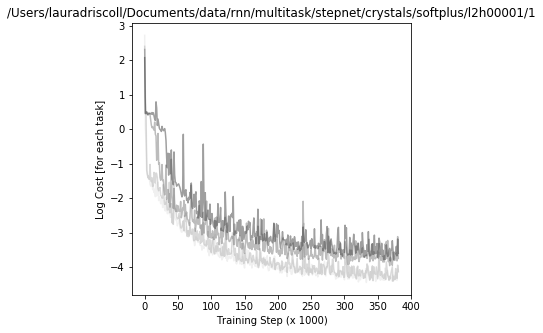

In [37]:
fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
for r in range(len(task_list)):
    c = cmap((r+1)/(len(task_list)+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+task_list[r]])
    plt.plot(x,'-',c = c,alpha = .5)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')
#     plt.ylim([-6,2])
    
plt.title(m)
plt.show()    

In [38]:
m

'/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001/1'

In [39]:
model = Model(m, sigma_rec=0)
with tf.Session() as sess:
    model.restore()
    hp = model.hp

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001/1/model.ckpt


In [32]:
variance.compute_variance(m)

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001_l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001_l2w0001/0/model.ckpt
[u'fdgo', u'reactgo', u'delaygo', u'fdanti', u'reactanti', u'delayanti', u'delaydm1', u'delaydm2', u'contextdelaydm1', u'contextdelaydm2', u'multidelaydm', u'dmsgo', u'dmsnogo', u'dmcgo', u'dmcnogo']
Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001_l2w0001/0/variance_rule.pkl
Variance saved at /Users/lauradriscoll/Documents

ValueError: No hp found for model_dir /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001_l2w0001/0/ckpts

Choosing 17 clusters


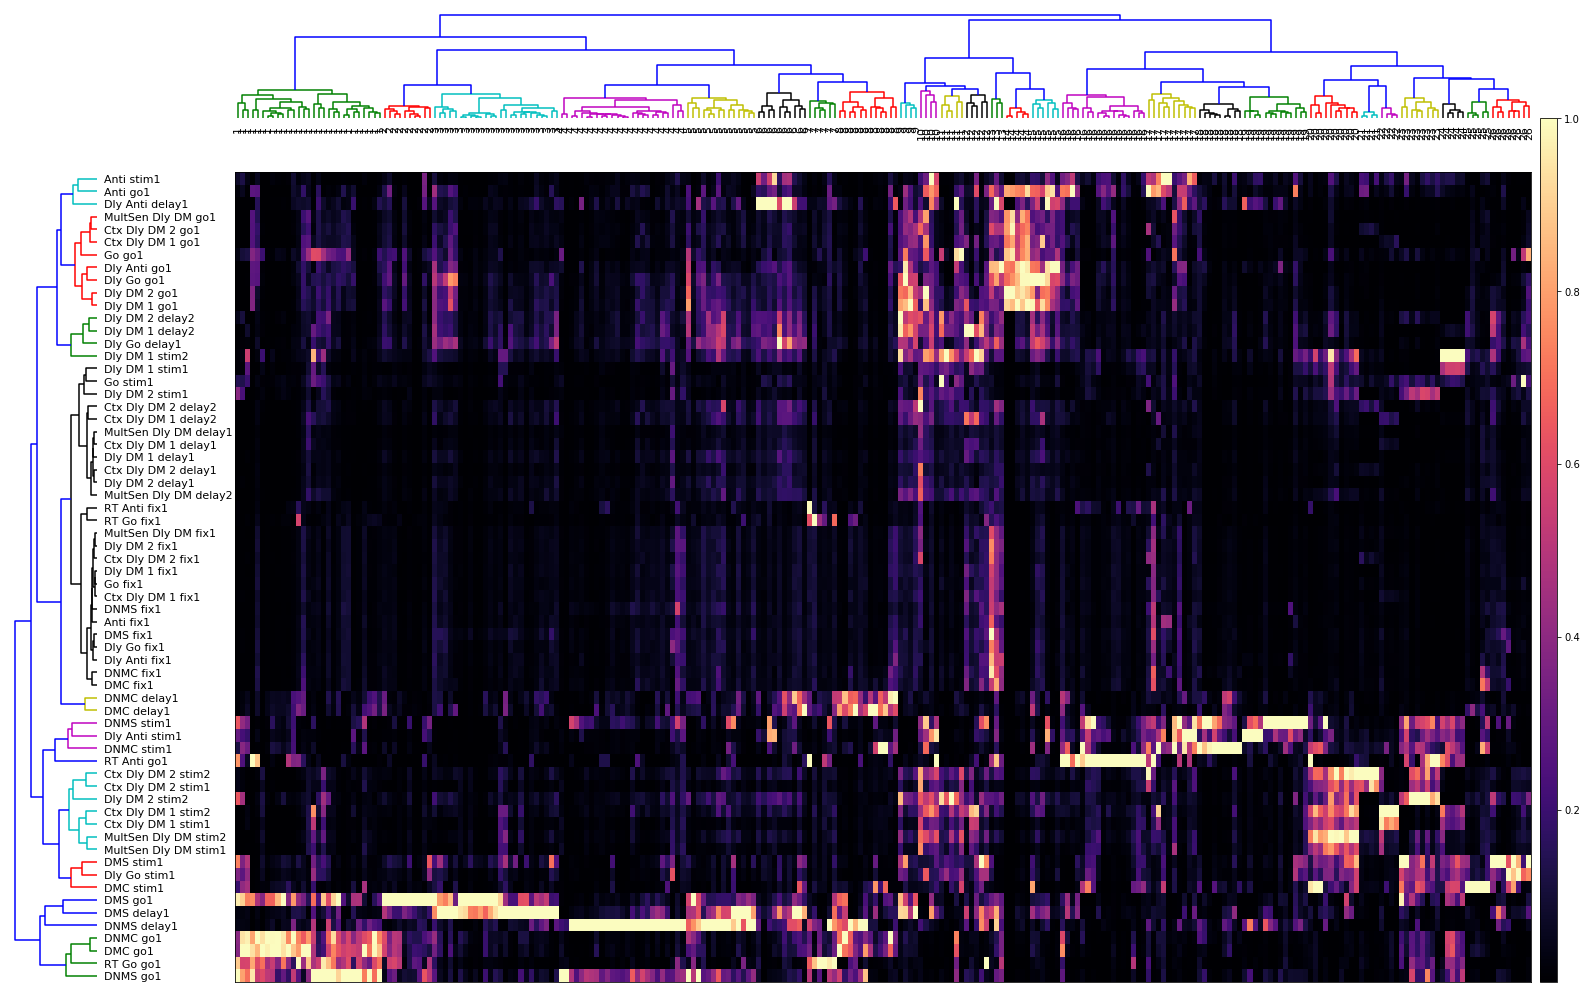

In [40]:
from tools_lnd import make_dendro
make_dendro(m,method = 'ward')

In [52]:
label_ind = [CA.labels[x] for x in index_top]

In [53]:
lesion_units_list = [None]
for il, l in enumerate(np.unique(clusters)):
    ind_l = np.where(clusters == l)[0]
    # In original indices
    lesion_units_list += [CA.ind_active[ind_l]]

In [54]:
lesion_units_list

[None,
 array([113, 224, 123, 102, 172]),
 array([109, 168,  69, 141,  90,  75, 124, 217]),
 array([ 59, 145, 155]),
 array([ 30, 202, 126,  41, 187, 238,   7, 162, 181,  89,  74,  64, 223,
         68, 140]),
 array([207, 100, 179, 144,  98]),
 array([ 35,  77, 230, 218,  15,  67,  71,  78, 148, 216]),
 array([186, 219,   1,   6,  55,   4]),
 array([214, 166, 215,  38,   9,   8,  50, 117,  62]),
 array([ 66,  19, 185, 173, 170, 225,  88, 154, 147, 121, 118]),
 array([ 63, 160,  23, 237, 130]),
 array([134,  49, 210, 133, 136,  28, 138,  12, 105, 139]),
 array([246,   2,  97, 255, 115,  99, 193, 150, 226]),
 array([ 85,  24, 243, 222,  14,  17, 180, 204, 116,  37, 167, 198, 171]),
 array([60, 52, 76, 79]),
 array([161]),
 array([153,  48, 164,  33,  73]),
 array([183, 132, 200, 128, 131,  20])]

In [51]:
CA.plot_lesions(save_name = save_name)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


KeyboardInterrupt: 

In [ ]:
perfs_changes, cost_changes = CA.lesions()

In [83]:
CA.labels

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  4,  4,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15,
       16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 24, 24, 25, 26, 26,
       26, 26, 26, 27, 27, 27], dtype=int32)

In [82]:
lesion_units_list = [None]
for il, l in enumerate(CA.unique_labels):
    ind_l = np.where(CA.labels == l)[0]
    # In original indices
    lesion_units_list += [CA.ind_active[ind_l]]

for i, lesion_units in enumerate(lesion_units_list):
    print(i)
    print(lesion_units)
    

0
None
1
[141 109 168  69]
2
[153 164  76  73  48  33]
3
[123 113 224 102 217 172]
4
[ 63 237  23]
5
[200 183]
6
[160]
7
[216 230 148  15  71 218]
8
[ 90  30  75 124]
9
[145  59 155]
10
[161]
11
[116  37  85]
12
[ 60  52 132  79]
13
[222  24 198 167  14 204 171  17]
14
[214  50   9   8  38  62 117 215 166]
15
[186 219   1  55   4   6]
16
[  2 226]
17
[140 207 126 238]
18
[144 179  98 100]
19
[ 99 193 243 180 255 150 115]
20
[67 77]
21
[ 64  41 202 187   7 181  68 223  89 162  74]
22
[139 105 210 136  49 130 138  28  12 133 134]
23
[78 35]
24
[ 97 246]
25
[173 118 170  88 147]
26
[66]
27
[ 19 185 225 121 154]
28
[131 128  20]


In [ ]:
# epoch = 'stim1'
# f = os.path.join(m,'tf_fixed_pts_all_init','fdanti',epoch+'_'+str(324)+'.0.npz')
# D_use,_,_ = make_FP_axs(f,m,'fdanti',epoch,axs ='pca', clust = 'False')
# axes_label1 = 'fp pca_1'
# axes_label2 = 'fp pca_2'
# axes_label3 = 'fp pca_3'

In [98]:
cluster=5

In [99]:
tasks_affected = np.where(perfs_changes[cluster,:]<-.5)[0]
task_list = [hp['rule_trains'][x] for x in tasks_affected]

NameError: name 'perfs_changes' is not defined

In [100]:
from tools_lnd import make_h_all

rule = 'delayanti'
# epoch = 'delay1'
hparams = model.hp
# trial = generate_trials(rule, hparams, 'test', noise_on=False)
h_all_byepoch, h_all_byrule = make_h_all(m)

X_rule = h_all_byrule[rule]
X_use = np.reshape(X_rule[:],(-1,hparams['n_rnn']))
for rule in task_list:
    X_rule = h_all_byrule[rule]
    X_use = np.concatenate((X_use,np.reshape(X_rule[:],(-1,hparams['n_rnn']))),axis = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
fp_pca = pca.fit_transform(X_use)
D_use = pca.components_.T
# D_use = D_use[:,[0,2,1]]
axes_label1 = 'pca_1'
axes_label2 = 'pca_2'
axes_label3 = 'pca_3'

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [101]:
react_tasks = [1,4]
delay_tasks = [0,2,3,5,6,7,8,9,10]
anti_tasks = [3,4,5]

task_list = [hp['rule_trains'][x] for x in anti_tasks]

In [102]:
print(task_list)

[u'fdanti', u'reactanti', u'delayanti']


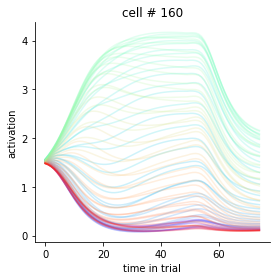

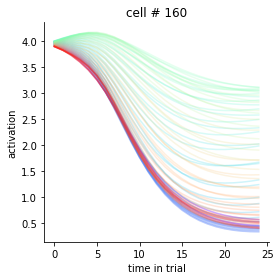

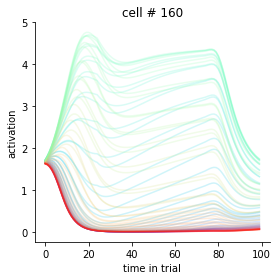

In [103]:
cmap = plt.get_cmap('rainbow')

cel_use = CA.ind_active[CA.labels==cluster]

for rule in task_list:
    fig = plt.figure(figsize=(4*len(cel_use),4),tight_layout=True,facecolor='white')
    X_use = h_all_byrule[rule]
    cel_i = 0
    for unit_i in cel_use:
        cel_i+=1
        ax = plt.subplot(1,len(cel_use),cel_i)
        X_flat = np.reshape(X_use[:],(-1,hp['n_rnn']))
        for n in range(80):
            plt.plot(X_flat[range(n,len(X_flat),80),unit_i],'-',c = cmap(n/80),alpha = .2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title('cell # '+(str(unit_i)))
        plt.xlabel('time in trial')
        plt.ylabel('activation')

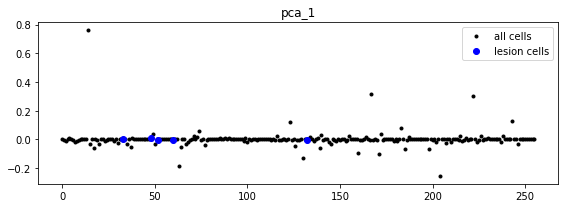

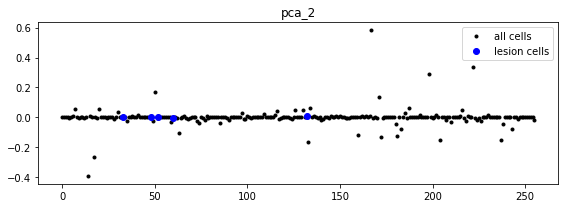

In [19]:
cels = CA.ind_active[CA.labels==cluster]
labels = [axes_label1,axes_label2]
for x in range(2):

    fig = plt.figure(figsize=(8,3),tight_layout=True,facecolor='white')
    plt.plot(D_use[:,x],'.k',label = 'all cells')
    plt.plot(cels,D_use[cels,x],'ob',label = 'lesion cells')
    plt.title(labels[x])
    plt.legend()
    plt.show()

In [17]:
from tools_lnd import get_model_params
w_in, b_in, w_out, b_out = get_model_params(m)
D_use = w_out[:,1:]

axes_label1 = 'W_{out} cos(theta)'
axes_label2 = 'W_{out} sin(theta)'

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [22]:
task_list = ['fdanti',]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from numpy import linalg as LA
from tools_lnd import make_h_trial_rule, get_T_inds, make_Beta
Beta_qr,Y_labels = make_Beta(m,task_list,'stim1',ind=-1)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [24]:
use_yinds = [2,1,3]
axes_label1 = Y_labels[use_yinds[0]]
axes_label2 = Y_labels[use_yinds[1]]
axes_label3 = Y_labels[use_yinds[2]]
D_use = Beta_qr[:,use_yinds]

In [25]:
D_use[:,1] = w_out[:,1]
axes_label2 = 'W_{out} cos(theta)'

In [26]:
react_tasks = [1,4]
delay_tasks = [0,2,3,5,6,7,8,9,10]
anti_tasks = [3,4,5]

task_list = [hp['rule_trains'][x] for x in anti_tasks]

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


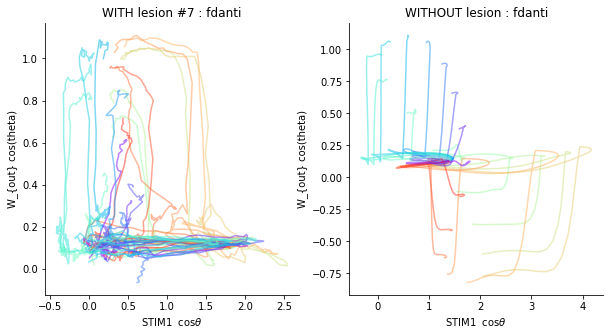

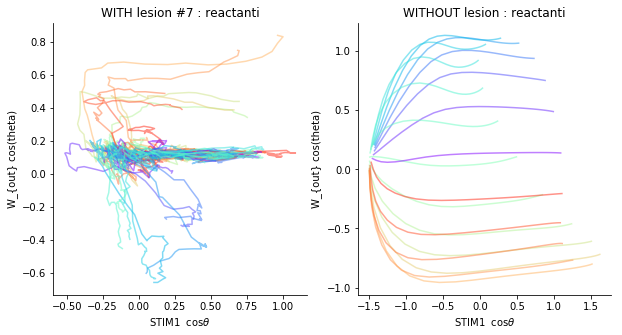

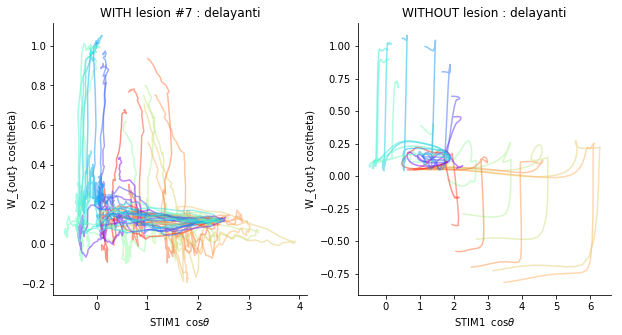

In [28]:
labels = CA.labels

from network import get_perf
from task import generate_trials

# lesion cluster
cluster = 6
ind_l = np.where(CA.labels == cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

#no lesion
# lesion_units_list = []


cmap = plt.get_cmap('rainbow')

model = FixedPoint_Model(CA.model_dir)
hp = model.hp
with tf.Session() as sess:
    model.restore()
    model._sigma=0
    if len(lesion_units_list)>0:
        model.lesion_units(sess, lesion_units_list)

    for rule in task_list:
        trial = generate_trials(rule, hp, 'test', noise_on = 'False')
        feed_dict = tools.gen_feed_dict(model, trial, hp)
        h_tf = sess.run([model.h], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)

        fig = plt.figure(figsize=(10, 5))
        for trial_i in range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/20)):
            c = cmap(trial.y_loc[-1,trial_i]/(2*np.pi))
            
            ax = plt.subplot(1,2,1)
            X_dot = np.dot(h_tf[0][:,trial_i,:],D_use)
            plt.plot(X_dot[:,0],X_dot[:,1],c = c,alpha = .5)
#             plt.ylim([-1.2,1.2])
#             plt.xlim([-5,5])
#             plt.ylim([-5,5])
            plt.xlabel(axes_label1)
            plt.ylabel(axes_label2)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False) 
            plt.title('WITH lesion #'+str(cluster+1)+' : '+rule)
            

            ax = plt.subplot(1,2,2)
            X_rule = np.dot(h_all_byrule[rule][:,trial_i,:],D_use)
            plt.plot(X_rule[:,0],X_rule[:,1],c = c,alpha = .5)
#             plt.ylim([-1.2,1.2])
#             plt.xlim([-5,5])
#             plt.ylim([-5,5])
            plt.xlabel(axes_label1)
            plt.ylabel(axes_label2)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False) 
            plt.title('WITHOUT lesion : '+rule)
            
        plt.show()

In [57]:
n_bins = 16
n_rep = 16
batch_size_test = 256*16
batch_size_test_rep = int(batch_size_test / n_rep)
clsq_tmp = list()
perf_tmp = np.empty((len(task_list),n_rep,n_bins-1))
        
model = Model(CA.model_dir)
hp = model.hp
with tf.Session() as sess:
    model.restore()
    model.lesion_units(sess, lesion_units_list)

    perfs_store = list()
    cost_store = list()
    for rule_i in range(len(task_list)):
        rule = task_list[rule_i]
        for i_rep in range(n_rep):
            trial = generate_trials(rule, hp, 'random',batch_size=batch_size_test_rep)
            feed_dict = tools.gen_feed_dict(model, trial, hp)
            y_hat_test, c_lsq = sess.run([model.y_hat, model.cost_lsq], feed_dict=feed_dict)

            # Cost is first summed over time, and averaged across batch and units
            # We did the averaging over time through c_mask

            # IMPORTANT CHANGES: take overall mean
            bins = np.linspace(0,2*np.pi,n_bins)
            perf_test = np.ones((n_bins-1))
            for theta_i in range(len(bins)-1):
                inds = [all([x>bins[theta_i],x<bins[theta_i+1]]) for x in trial.y_loc[-1,:]]
                perf_test[theta_i] = np.mean(get_perf(y_hat_test[:,inds,:], trial.y_loc[:,inds]))
                
            perf_tmp[rule_i,i_rep,:] = perf_test
#                 clsq_tmp.append(c_lsq)
                

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [58]:
task_list

[u'fdanti', u'reactanti', u'delayanti']

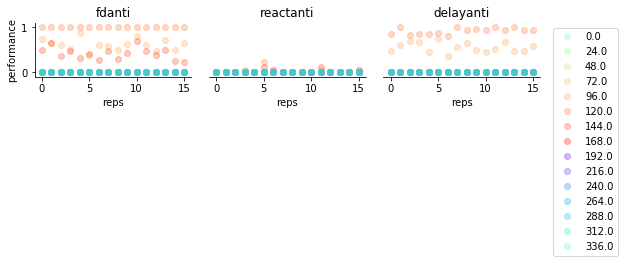

In [59]:
fig = plt.figure(figsize=(3*len(task_list),3),tight_layout=True,facecolor='white')
for rule_i in range(len(task_list)):
    ax = plt.subplot(1,len(task_list),rule_i+1)
    for theta_i in range(len(bins)-1):
        c = (180*(np.pi + bins[theta_i])/np.pi)%360
        plt.plot(perf_tmp[rule_i,:,theta_i],'o',c = cmap(c/360),alpha = .3,label = str(round(180*bins[theta_i]/np.pi,0)))
    plt.ylim([-.1,1.1])
    plt.title(task_list[rule_i])
    plt.xlabel('reps')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if rule_i==0:
        plt.ylabel('performance')
    else:
        ax.spines['left'].set_visible(False)
        plt.yticks([])
            
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [170]:
vmins = [-0.5, -0.5]
vmaxs = [+0.5, +0.5]
ticks = [[-0.5,0.5], [-0.5, 0.5]]

In [ ]:
plt.imshow(perfs_changes.T, cmap='coolwarm', aspect='auto',
                           interpolation='nearest', vmin=vmins[i], vmax=vmaxs[i])

In [29]:
def plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,t_num,fp_epoch,sorted_fps,fp_inds,eig_decomps,
                   xlabel = 'FP set PC1',ylabel = 'FP set PC2',rand_step_coef = 0.1,n_steps = 100,
                   lw = 3,al = .6,linestyle = '-',n_jit = 0,c = 'k'):

    cmap=plt.get_cmap('rainbow')
        
    model = Model(m)
    with tf.Session() as sess:
        model.restore()
        model._sigma=0
        if len(lesion_units_list)>0:
            model.lesion_units(sess, lesion_units_list)
        hparams = model.hp
        alpha = hparams['dt']/hparams['tau']
        var_list = model.var_list
        params = [sess.run(var) for var in var_list]

        trial = generate_trials(rule, hparams, mode='test',noise_on=False)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, _ = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        T,S,N = np.shape(h_tf)
        T_inds = get_T_inds(trial,fp_epoch) # grab epoch time indexing
        x_t = np.matlib.repmat(trial.x[T_inds[1],t_num,:],n_steps,1)
        
        fp_project = np.dot(sorted_fps,D_use)

        # runs jitters around fps
        stable = np.empty(len(fp_inds))
        for fp_ind in fp_inds:

            for jit in range(n_jit):
                h0 = sorted_fps[fp_ind,:] + rand_step_coef*npr.randn(N)
                h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
                jitter = np.dot(h_t,D_use)
                ax.plot3D(jitter[:,0],jitter[:,1],jitter[:,2],'-',c = 'k',linewidth = .1)
                
            stable[fp_ind] = np.max(eig_decomps[fp_ind]['evals'].real**2+eig_decomps[fp_ind]['evals'].imag**2)

        stable_inds = np.where(stable<1)[0]
        ax.plot3D(fp_project[stable_inds,0],fp_project[stable_inds,1],fp_project[stable_inds,2],'o',
        c = c,markersize = 10, markerfacecolor = c,alpha = 1,linewidth = 5)

        unstable_inds = np.where(stable>1)[0]
        ax.plot3D(fp_project[unstable_inds,0],fp_project[unstable_inds,1],fp_project[unstable_inds,2],'o',
        c = c,markersize = 10, markerfacecolor = 'None',alpha = 1,linewidth = 5)
                
        #runs one state for n_steps starting from initial conditions
        for jit in range(1):
            h0 = h_tf[T_inds[0],t_num,:]
            h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
            jitter = np.dot(h_t,D_use)
            ax.plot3D(jitter[:,0],jitter[:,1],jitter[:,2],'-',c = c,linewidth = 3)

In [30]:
def plot_N3D(ax,X, D, clist, linewidth = 1, alpha = .5, linestyle = '-'):
    """Plot activity is some 2D space.

        Args:
            X: neural activity in Trials x Time x Neurons
            D: Neurons x 2 plotting dims
        """

    cmap=plt.get_cmap('rainbow')
    S = np.shape(X)[0]
    
    for s in range(S):

        if isinstance(c_list, str) :
            c = clist
        else:
            c = cmap(clist[s]/max(clist))

        X_trial = np.dot(X[s,:,:],D.T)
#         ax.scatter3D(X_trial[-1,0],X_trial[-1,1],X_trial[-1,2],'^',c = c, linewidth = linewidth, alpha = alpha)
        ax.plot3D(X_trial[:,0],X_trial[:,1],X_trial[:,2],linestyle,c = c, linewidth = linewidth, alpha = alpha)
#         ax.scatter3D(X_trial[0,0],X_trial[0,1],X_trial[0,2],'.',c = c, linewidth = linewidth, alpha = alpha)

In [31]:
lesion_cluster = 6
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [35]:
lesion_units_list

[]

In [38]:
%matplotlib

Using matplotlib backend: MacOSX


In [72]:
lesion_cluster

6

In [103]:
lesion_units_list

[]

In [95]:
lesion_cluster = 6
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [32]:
lesion_units_list = []

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

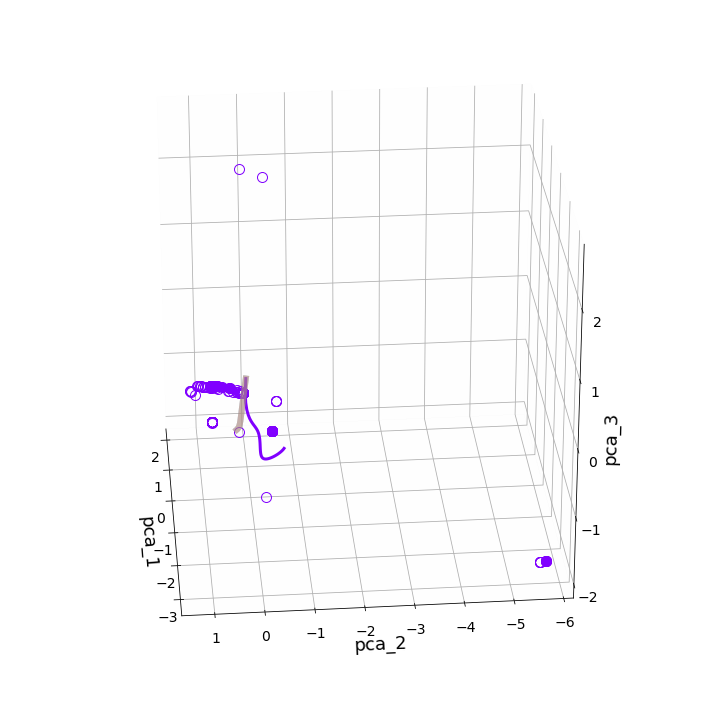

In [117]:
########## TASK DYNAMICS ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0,comp_eig_decomp
import numpy.random as npr


for offset in [0,]:#[0,]:#range(0,360,72):# 144 [180+3*36,]:#
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    t_set = [(offset+180)%360, (180+offset)%360]
    trial_num = [int((offset)/4.5),int(offset/4.5)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti',]
    epoch_set = ['fix1',]
    step_file = 'task_dynamics'
    linestyle = ['-','--']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(rule_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set[:len(rule_set)])

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['darkorchid','orange']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        if len(lesion_units_list)>0:
            f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        else:
            f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        
        fp_struct = np.load(f)
        sorted_fps = fp_struct['xstar']
        fp_inds = range(len(sorted_fps))
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
        
        
        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch)
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

        #color by stim
        c_list = np.min(trial.stim_locs,axis=1)

        #color by target
    #     c_list = trial.y_loc[-1,:]

    
        plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ri],epoch,sorted_fps,fp_inds,eig_decomps,
               rand_step_coef = 0.1, al = 1, linestyle = linestyle, n_steps = 60, 
                   n_jit = 0,c = cmap_rainbow(c_list[trial_num[ri]]/(2*np.pi)))


        plot_N3D(ax,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ri],alpha = .1)
    
    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
        tit = 'lesion_fps'+str(lesion_cluster)+rule_str+'_'+epoch_str+'_'+trial_str
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        tit = 'no lesion '+rule_str+'_'+epoch_str+'_'+trial_str
        
        
    
#     ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.view_init(27, 175)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
#     figname = tit+'_'+step_file+'_'+str(t_set[0])
    figname = tit+'_'+step_file+'_'+str(trial_num[0])
#     figname = 'no_trials'
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

In [68]:
tit

'lesion_fps6reactgo_go1_288.0'

In [102]:
save_dir

'/Users/lauradriscoll/Documents/code/overleaf/multitask-nets/v1_figs/clusters/task_dynamics/STIM1  $\\cos{\\theta}$'

In [36]:
from tools_lnd import make_h_all

rule = 'fdanti'
# epoch = 'delay1'
hparams = model.hp
# trial = generate_trials(rule, hparams, 'test', noise_on=False)
h_all_byepoch, h_all_byrule = make_h_all(m)

X_rule = h_all_byrule[task_list[0]]
X_use = np.reshape(X_rule[:],(-1,hparams['n_rnn']))
for rule in task_list:
    X_rule = h_all_byrule[rule]
    X_use = np.concatenate((X_use,np.reshape(X_rule[:],(-1,hparams['n_rnn']))),axis = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
fp_pca = pca.fit_transform(X_use)
D_use = pca.components_.T
# D_use = D_use[:,[0,2,1]]
axes_label1 = 'pca_1'
axes_label2 = 'pca_2'
axes_label3 = 'pca_3'

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [44]:
########## X STIM ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0, comp_eig_decomp
import numpy.random as npr


for offset in [360-108,]:#range(36,359,36):# 144
    fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
    t_set = [(180+offset)%360, (180+offset+36)%360]
    trial_num = [int(offset/4.5),int((8+offset/4.5)%80)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti',]
    epoch_set = ['stim1','stim1']
    step_file = 'interp_stim'
    linestyle = ['-','-']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(epoch_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set)

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['navy','gold']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        for ti in range(len(t_set)):
            if len(lesion_units_list)>0:
                f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ti])+'.0.npz')
            else:
                f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ti])+'.0.npz')


            fp_struct = np.load(f)
            sorted_fps = fp_struct['xstar']
            fp_inds = range(len(sorted_fps))
            eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])


            _,x = gen_X_from_model_dir(m,trial)
            T_inds = get_T_inds(trial,epoch)
            x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

            #color by stim
            c_list = np.min(trial.stim_locs,axis=1)

            #color by target
        #     c_list = trial.y_loc[-1,:]


            plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ti],epoch,sorted_fps,fp_inds,eig_decomps,
                   rand_step_coef = 0.1, al = 1, linestyle = linestyle[ri], n_steps = 300, 
                       n_jit = 0,c = cmap_discrete[ti])#cmap_rainbow(c_list[trial_num[ti]]/(2*np.pi)))


        plot_N3D(ax,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ti],alpha = .3)
    #     c_list = cmap_discrete[ri]
    #     highlight_trial = [trial_num[0],]
    #     plot_N3D(x_epoch[highlight_trial,:,:],D_use.T,c_list,linewidth = 3, linestyle = '-',alpha = 1)

        for step_i in range(n_interp):

            #a couple diff versions on filenames atm
    #         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

#             f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
#             f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)
            f = rule_str+'_'+'stim1'+'_'+trial_str+'_step_'+str(step_i)

            filename = os.path.join(m,step_file,rule_str,f+'.npz')
            fp_struct = np.load(filename)
            step_fps = fp_struct['xstar']

            fp_project = np.dot(step_fps,D_use)
            ax.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))

    tit = 'X STIM '+rule_str+'_'+epoch_str+'_'+trial_str
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.view_init(27, 175)

    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    figname = tit+'_'+step_file+'_'+str(t_set[0])
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    print(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

In [45]:
from tools_lnd import make_FP_axs,take_names
axs ='pca'
ri = 0
rule = rule_set[ri]
epoch_axs = 1
f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch_set[epoch_axs]+'_'+str(t_set[epoch_axs])+'.0.npz')
D_use,_,_ = make_FP_axs(f,m,rule,epoch_set[epoch_axs],axs =axs, clust = 'False')
epoch_name1, rule_name1, _, _ = take_names(epoch_set[0],rule_set[0])
epoch_name2, rule_name2, _, _ = take_names(epoch_set[1],rule_set[0])
axes_label1 = axs + ' 1'
axes_label2 = axs + ' 2'
axes_label3 = axs + ' 3'

stim1
go1


In [45]:
from scipy.spatial import distance
from numpy import linalg as LA
from tools_lnd import eigenspectrum_axes
def dst_to_h(h,sorted_fps):
    X = np.squeeze(sorted_fps).astype(np.float64)
    dst = np.zeros((np.shape(X)[0]))
    for xi in range(np.shape(X)[0]):
            dst[xi] = distance.euclidean(h, X[xi,:])
    return dst

In [46]:
def proximate_fp(h,sorted_fps):
    proximate_fps = np.argsort(dst_to_h(h,sorted_fps))
    return proximate_fps

In [62]:
epoch_set = ['stim1','stim1',]
rule_set = ['fdanti','fdanti']
rule = rule_set[0]
trial_num = 0
trial = gen_trials_from_model_dir(m,rule,noise_on = False)
_,x = gen_X_from_model_dir(m,trial)
T_inds = get_T_inds(trial,epoch_set[0])
h = x[:,trial_num,T_inds[1]]

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

In [63]:
fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
ax1 = fig.add_subplot(111)

xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1 - xs**2)

t_set = [0,36]
trial_str = '_'.join(str(round(t,2)) for t in t_set)


for ti in range(len(t_set)):#n_interp
    c = cmap_grad(ti/len(t_set))
    
    if len(lesion_units_list)>0:
        f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ti])+'.0.npz')
    else:
        f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ti])+'.0.npz')

    print(f)
    filename = os.path.join(m,step_file,rule_str,f)
    fp_struct = np.load(filename)
    step_fps = fp_struct['xstar']
        
    proximate_fps = proximate_fp(h,step_fps)
    fp_num = proximate_fps[0]
    evals, _ = LA.eig(fp_struct['J_xstar'][fp_num,:,:]) 
    ax1.plot(evals.real,evals.imag,'.',c=c,alpha = .3,markerfacecolor = c)
    
ax1.plot(xs, ys,':k',linewidth = 1)
ax1.plot(xs, -ys,':k',linewidth = 1)
plt.xlim((.5,1.1))
plt.ylim((-.25,.25))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
eigenspectrum_axes(epoch,ax1)
ax1.set_aspect('equal')   
plt.show()

/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/tf_fixed_pts_all_init/fdanti/stim1_0.0.npz
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/tf_fixed_pts_all_init/fdanti/stim1_36.0.npz


In [55]:
plt.xlim((.5,1.1))
plt.ylim((-.25,.25))

(-0.25, 0.25)

In [70]:


xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1 - xs**2)

for offset in range(0,360,36):
    
    t_set = [offset,offset+36]
    trial_str = '_'.join(str(round(t,2)) for t in t_set)
    
    fig = plt.figure(figsize=(6,6),tight_layout=True,facecolor='white')
    ax1 = fig.add_subplot(111)

    for step_i in range(n_interp):#n_interp
        c = cmap_grad(step_i/n_interp)

        f = rule_set[0]+'_'+epoch_set[0]+'_'+epoch_set[1]+'_'+str(t_set[0])+'_step_'+str(step_i)
    #     f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)
        f = rule_str+'_'+'stim1'+'_'+trial_str+'_step_'+str(step_i)

        print(f)
        filename = os.path.join(m,step_file,rule_str,f+'.npz')
        fp_struct = np.load(filename)
        step_fps = fp_struct['xstar']

        proximate_fps = proximate_fp(h,step_fps)
        fp_num = proximate_fps[0]
        evals, _ = LA.eig(fp_struct['J_xstar'][fp_num,:,:]) 
        ax1.plot(evals.real,evals.imag,'.',c=c,alpha = .3,markerfacecolor = c)

    ax1.plot(xs, ys,':k',linewidth = 1)
    ax1.plot(xs, -ys,':k',linewidth = 1)
    plt.xlim((.7,1.1))
    plt.ylim((-.25,.25))
    plt.title(trial_str)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    eigenspectrum_axes(epoch,ax1)
    ax1.set_aspect('equal')   
    plt.show()

fdanti_stim1_0.0_36.0_step_0
fdanti_stim1_0.0_36.0_step_1
fdanti_stim1_0.0_36.0_step_2
fdanti_stim1_0.0_36.0_step_3
fdanti_stim1_0.0_36.0_step_4
fdanti_stim1_0.0_36.0_step_5
fdanti_stim1_0.0_36.0_step_6
fdanti_stim1_0.0_36.0_step_7
fdanti_stim1_0.0_36.0_step_8
fdanti_stim1_0.0_36.0_step_9
fdanti_stim1_0.0_36.0_step_10
fdanti_stim1_0.0_36.0_step_11
fdanti_stim1_0.0_36.0_step_12
fdanti_stim1_0.0_36.0_step_13
fdanti_stim1_0.0_36.0_step_14
fdanti_stim1_0.0_36.0_step_15
fdanti_stim1_0.0_36.0_step_16
fdanti_stim1_0.0_36.0_step_17
fdanti_stim1_0.0_36.0_step_18
fdanti_stim1_0.0_36.0_step_19
fdanti_stim1_36.0_72.0_step_0
fdanti_stim1_36.0_72.0_step_1
fdanti_stim1_36.0_72.0_step_2
fdanti_stim1_36.0_72.0_step_3
fdanti_stim1_36.0_72.0_step_4
fdanti_stim1_36.0_72.0_step_5
fdanti_stim1_36.0_72.0_step_6
fdanti_stim1_36.0_72.0_step_7
fdanti_stim1_36.0_72.0_step_8
fdanti_stim1_36.0_72.0_step_9
fdanti_stim1_36.0_72.0_step_10
fdanti_stim1_36.0_72.0_step_11
fdanti_stim1_36.0_72.0_step_12
fdanti_stim1_36.0

IOError: [Errno 2] No such file or directory: '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/interp_stim/fdanti/fdanti_stim1_144.0_180.0_step_0.npz'

In [124]:
fig = plt.figure(figsize=(18,6),tight_layout=True,facecolor='white')

step_file = 'interp_stim'
epoch_set = ['go1','go1']
offset = 180+3*36
t_set = [(offset)%360, (offset+36)%360]
trial_num = [int(offset/4.5),int(8+offset/4.5)]
rule_set = ['fdgo','fdgo']
rule_str = '_'.join(str(r) for r in [rule_set[0],])

# step_file = 'interp_epoch'
# epoch_set = ['stim1','go1']
# t_set = [288,288]
# trial_num = [64,64]
# rule_set = ['fdgo','fdgo']
# rule_str = '_'.join(str(r) for r in rule_set)

trial_set = range(0,80,8)
linestyle = ['-',':']

trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(epoch_set)])

epoch_str = '_'.join(str(r) for r in epoch_set)

cmap_grad = plt.get_cmap('plasma')
cmap_discrete = ['navy','gold']
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
w_color = .005
ax1.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
ax1.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
ax1.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

for ei in range(len(epoch_set)):
    rule = rule_set[ei]
    epoch = epoch_set[ei]
    t_ind = t_set[ei]
    
    f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_ind)+'.0.npz')

    fp_struct = np.load(f)
    sorted_fps = fp_struct['xstar']
    fp_inds = range(len(sorted_fps))
    eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
    
    trial = gen_trials_from_model_dir(m,rule,noise_on = False)
    _,x = gen_X_from_model_dir(m,trial)
    T_inds = get_T_inds(trial,epoch_set[ei])
    x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

    plot_FP_jitter_3D_lesion(lesion_units_list,ax1,m,D_use,rule,trial_num[ei],epoch,sorted_fps,fp_inds,eig_decomps,
           rand_step_coef = 0.1, al = 1, linestyle = linestyle[ei], n_steps = 300, 
               n_jit = 0,c = cmap_discrete[ei])#cmap_rainbow(c_list[trial_num[ei]]/(2*np.pi)))
    plot_N3D(ax1,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ei],alpha = .3)

    plot_FP_jitter_3D_lesion(lesion_units_list,ax2,m,D_use,rule,trial_num[ei],epoch,sorted_fps,fp_inds,eig_decomps,
           rand_step_coef = 0.1, al = 1, linestyle = linestyle[ei], n_steps = 300, 
               n_jit = 0,c = cmap_discrete[ei])#cmap_rainbow(c_list[trial_num[ei]]/(2*np.pi)))
    plot_N3D(ax2,x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ei],alpha = .3)


    h_ref = x[:,trial_num[0],T_inds[1]]
    for step_i in range(n_interp):#n_interp
        
        c = cmap_grad(step_i/n_interp)

        #a couple diff versions on filenames atm
#         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

#         f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
#         f = rule_set[0]+'_'+epoch_set[0]+'_'+epoch_set[1]+'_'+str(t_set[0])+'_step_'+str(step_i)
        f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)

        filename = os.path.join(m,step_file,rule_str,f+'.npz')
        fp_struct = np.load(filename)
        step_fps = fp_struct['xstar']
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])

        fp_project = np.dot(step_fps,D_use)
        ax1.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))
        
        proximate_fps = proximate_fp(h_ref,step_fps)
        fp_num = proximate_fps[0]
        h_ref = step_fps[fp_num,:]
        evals, _ = LA.eig(fp_struct['J_xstar'][fp_num,:,:]) 
        fp_set = [fp_num,]
        ax2.plot3D(fp_project[fp_set,0],fp_project[fp_set,1],fp_project[fp_set,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))
        
        ax3.plot(evals.real,evals.imag,'.',c=c,alpha = .3,markerfacecolor = c)
    
ax3.plot(xs, ys,':k',linewidth = 1)
ax3.plot(xs, -ys,':k',linewidth = 1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
eigenspectrum_axes(epoch,ax3)
ax3.set_aspect('equal')   
plt.show()
        
               
tit = step_file +' '+ epoch_set[0]+' vs. '+epoch_set[1]
plt.title(tit,fontsize = 18)
ax1.xlabel(axes_label1,fontsize = 18)
ax1.ylabel(axes_label2,fontsize = 18)

if not os.path.exists(os.path.join(figpath,step_file)):
    os.makedirs(os.path.join(figpath,step_file))
figname = axes_label1+'_'+axes_label2+'_'+rule+'_'+epoch+'_'+str(t_set[0])+'_'+tit
figname = axs+'_'+rule+'_'+epoch+'_'+str(t_set[0])+'_'+tit
figname = rule_str+'_'+epoch_str+'_'+trial_str
plt.savefig(os.path.join(figpath,step_file,figname+'.pdf'))
plt.savefig(os.path.join(figpath,step_file,figname+'.png'))
plt.show()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

AttributeError: 'Axes3DSubplot' object has no attribute 'xlabel'

In [18]:
ax.view_init(27, 175)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

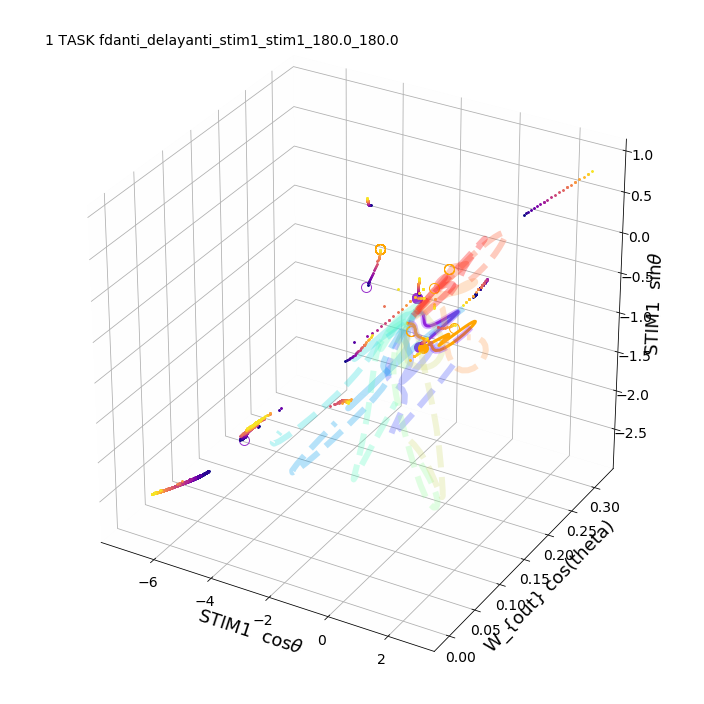

In [24]:
########## X TASK ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0,comp_eig_decomp
import numpy.random as npr


for offset in [0,]:#range(0,360,72):# 144
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    t_set = [(180+offset)%360, (180+offset)%360]
    trial_num = [int(offset/4.5),int(offset/4.5)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti','delayanti']
    epoch_set = ['stim1','stim1']
    step_file = 'interp_tasks'
    linestyle = ['-',':']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(rule_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set[:len(rule_set)])

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['darkorchid','orange']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        if len(lesion_units_list)>0:
            f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        else:
            f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        
        fp_struct = np.load(f)
        sorted_fps = fp_struct['xstar']
        fp_inds = range(len(sorted_fps))
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
        
        
        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch)
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

        #color by stim
        c_list = np.min(trial.stim_locs,axis=1)

        #color by target
    #     c_list = trial.y_loc[-1,:]

    
        plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ri],epoch,sorted_fps,fp_inds,eig_decomps,
               rand_step_coef = 0.1, al = 1, linestyle = linestyle, n_steps = 300, 
                   n_jit = 0,c = cmap_discrete[ri])


        plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ri],alpha = .3)
    #     c_list = cmap_discrete[ri]
    #     highlight_trial = [trial_num[0],]
    #     plot_N3D(x_epoch[highlight_trial,:,:],D_use.T,c_list,linewidth = 3, linestyle = '-',alpha = 1)

        for step_i in range(n_interp):

            #a couple diff versions on filenames atm
    #         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

            f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
    #         f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)

            filename = os.path.join(m,step_file,rule_set[0]+'_'+rule_set[1],f+'.npz')
            fp_struct = np.load(filename)
            step_fps = fp_struct['xstar']

            fp_project = np.dot(step_fps,D_use)
            ax.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))

    tit = '1 TASK '+rule_str+'_'+epoch_str+'_'+trial_str
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    figname = tit+'_'+step_file+'_'+str(t_set[0])
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

In [126]:
#### conectivity analyses
from tools_lnd import get_model_params
w_in, b_in, w_out, b_out = get_model_params(m)

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [128]:
lesion_cluster = 2
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [212]:
within_rec = []
w_rec = w_in[25:]
all_cells = range(len(w_rec))
for clust_j in lesion_units_list:
    within_rec_temp = [w_rec[clust_j,i] for i in lesion_units_list]
    within_rec.append(within_rec_temp)

In [200]:
fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
nonzero_inds = w_rec.flatten('F')>0
nonzero_cxns = np.log(w_rec.flatten('F')[nonzero_inds])
# plt.hist(nonzero_cxns,100)
plt.hist(np.log(within_rec))
plt.show()

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [170]:
nonzero_inds = w_rec.flatten('F')>0

In [173]:
nonzero_inds = w_rec.flatten('F')>0
nonzero_cxns = w_rec.flatten('F')[nonzero_inds]

In [179]:
x = [2*i for i in lesion_units_list]

In [188]:
# mylist = []
mylist.append(3)

In [199]:
np.shape(within_rec)

(5, 5)

In [205]:
np.shape(np.diag(w_rec))

(256,)

In [213]:
fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
plt.hist(np.diag(w_rec))
plt.show()

In [215]:
for n in range(10):
    npr.permutation(w_rec.flatten('F'))[:len(w_rec)]

In [233]:
fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
# for n in range(100):
#     plt.hist(npr.permutation(w_rec.flatten('F'))[:len(w_rec)],color = 'k',alpha = .05)
    

plt.hist(npr.permutation(w_rec.flatten('F'))[:len(w_rec)],color = 'None',edgecolor = 'r',alpha = .8)
plt.show()

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: color kwarg must have one color per dataset